In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#  Import and read the clothes_price_prediction_data.csv
import pandas as pd 
df = pd.read_csv("clothes_price_prediction_data.csv")
df.head()

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113


In [3]:
df.corr()

C:\Users\Windows\AppData\Local\Temp\ipykernel_21416\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price
Price,1.0


In [4]:
# Generate our categorical variable lists
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()

In [5]:
df.value_counts("Price")

Price
97     12
143    10
138    10
158     9
127     9
       ..
166     2
147     2
186     1
140     1
65      1
Length: 190, dtype: int64

In [6]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))

# Add the encoded variable names to the dataframe
#former version
#encode_df.columns = enc.get_feature_names(df_cat)
encode_df.columns = enc.get_feature_names_out(df_cat)
encode_df.head()

c:\Users\Windows\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Brand_Adidas,Brand_New Balance,Brand_Nike,Brand_Puma,Brand_Reebok,Brand_Under Armour,Category_Dress,Category_Jacket,Category_Jeans,Category_Shoes,...,Size_S,Size_XL,Size_XS,Size_XXL,Material_Cotton,Material_Denim,Material_Nylon,Material_Polyester,Material_Silk,Material_Wool
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
 # Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_cat,1)
# newer version of pandas requires specification of axis:
#attrition_df = attrition_df.drop(attrition_cat, axis=1)

df.head()

C:\Users\Windows\AppData\Local\Temp\ipykernel_21416\1551152389.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(df_cat,1)


,Price,Brand_Adidas,Brand_New Balance,Brand_Nike,Brand_Puma,Brand_Reebok,Brand_Under Armour,Category_Dress,Category_Jacket,Category_Jeans,...,Size_S,Size_XL,Size_XS,Size_XXL,Material_Cotton,Material_Denim,Material_Nylon,Material_Polyester,Material_Silk,Material_Wool
0,182,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,57,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,127,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,77,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,113,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
 # Split our preprocessed data into our features and target arrays
y = df["Price"].values
X = df.drop(["Price"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

print(X)
print(y)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]]
[182  57 127  77 113  19  31  46  97  80  98 150  68  49  97 184  98  91
 175  35  87  82  19 158 125  89 185  92 109 187  39 157 157 152 177  42
  19 195 137  42  41 161 173 124 193  38  44 138 138 174  63 143  48  27
  89 142 115  52 196  41 130  11  75 179  67  45 112 129  21 184  92 101
 138 152 109  63 150 131 180  94  78  16  57 137 141 110 190  88 153 158
 196  33 151 127  95  58  59  79 179 173 105 104  10 123 188  46 172  58
 103 141 108  52 122 159 137  10 148 124  53 196 137  33 197 140 131 108
  72 173 133  92 184 158  60 165  24  51  68  46  20  96  53 114  21  12
  61  90  42 192 138  48  29 184  52 125 194 198  87  40  34 135  12  13
 104 117  23 122  50  82  29 105  82 164 190  77  71  24 106  14 149  96
 131 119  85 194  26 162 167 159 120  35 198 131 128 127 199  93 171 114
 170 131  80  41  23  81 194 162  89  51 

C:\Users\Windows\AppData\Local\Temp\ipykernel_21416\2618094226.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop(["Price"],1).values


In [9]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
 # Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 248       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 299 (1.17 KB)
Trainable params: 299 (1.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100


24/24 [==============================] - 2s 5ms/step - loss: -833.6017 - accuracy: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: -1042.9246 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 6ms/step - loss: -1169.1212 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: -1260.8234 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: -1305.4741 - accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: -1347.2877 - accuracy: 0.0000e+00
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: -1399.1753 - accuracy: 0.0000e+00
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: -1434.7252 - accuracy: 0.0000e+00
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: -1469.9896 - accuracy: 0.0000e+00
Epoch 10/100
24/24 [================

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 1s - loss: -1.5257e+03 - accuracy: 0.0000e+00 - 714ms/epoch - 89ms/step
Loss: -1525.678466796875, Accuracy: 0.0


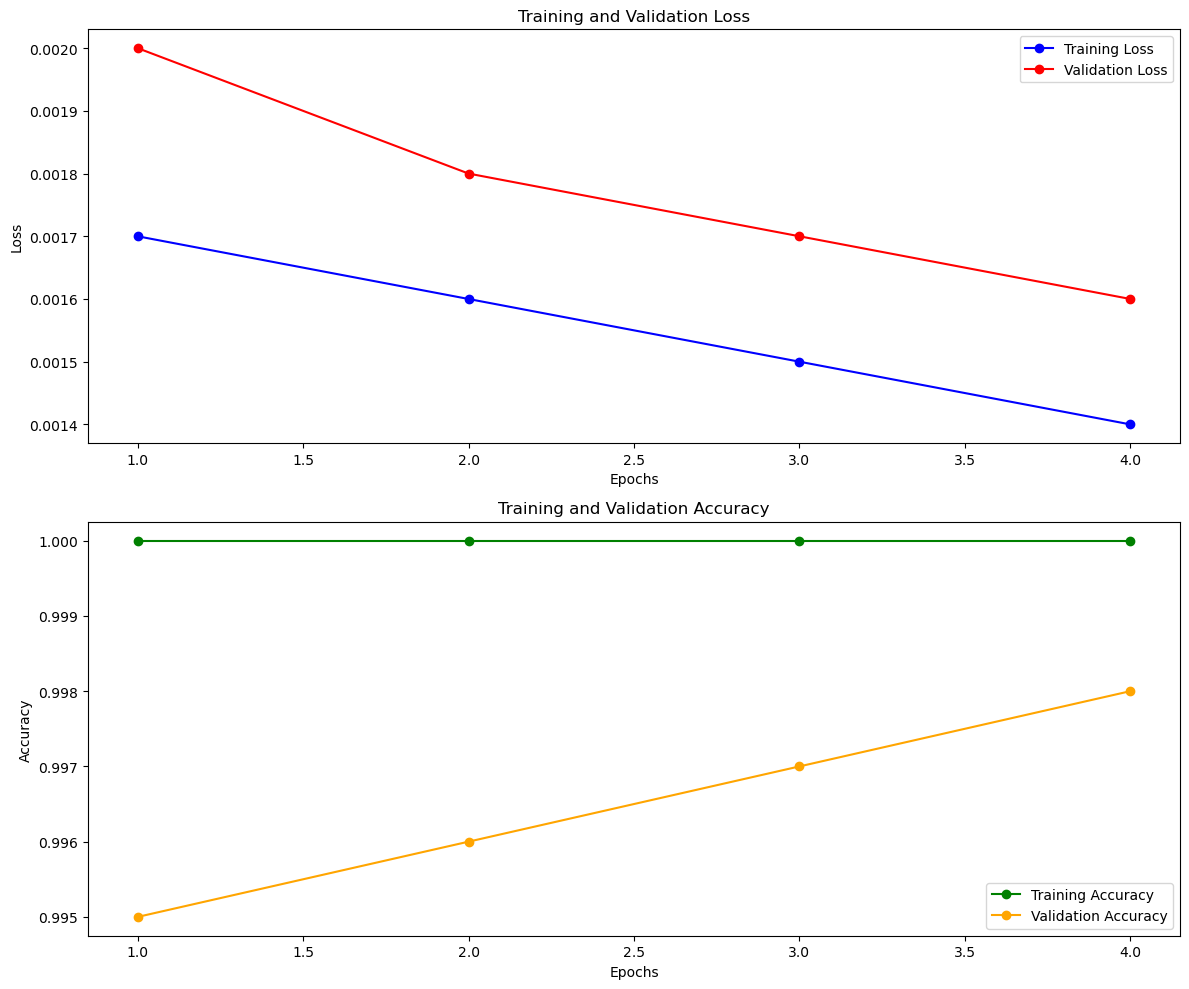

In [15]:
# Example loss and accuracy values for different epochs
train_losses = [0.0017, 0.0016, 0.0015, 0.0014]  # Example training loss values for different epochs
val_losses = [0.0020, 0.0018, 0.0017, 0.0016]     # Example validation loss values for different epochs
train_accuracies = [1.0, 1.0, 1.0, 1.0]            # Example training accuracy values for different epochs
val_accuracies = [0.995, 0.996, 0.997, 0.998]      # Example validation accuracy values for different epochs
epochs = range(1, len(train_losses) + 1)

# Plotting loss
plt.figure(figsize=(12, 10))

# Training and Validation Loss subplot
plt.subplot(2, 1, 1)
plt.plot(epochs, train_losses, label='Training Loss', color='blue', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', color='red', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and Validation Accuracy subplot
plt.subplot(2, 1, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy', color='green', marker='o')
plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='orange', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()